In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from datafold.pcfold import TSCDataFrame, GaussianKernel
from datafold.dynfold import DMDFull
from datafold.dynfold.transform import TSCRadialBasis, TSCPolynomialFeatures
from datafold.appfold import EDMD

In [2]:
# Loading data.
def load_data():
    filename = 'datasets/MI_timesteps.txt'
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        next(reader)
        rows = []
        for row in reader:
            rows.append(row)
        return rows

# Visualizing data.
def plot_data(data, col):
    plt.figure(figsize=(10,7))
    plt.xlabel('t')
    plt.ylabel('x_i')
    plt.yticks([],[])
    plt.plot(range(data.shape[0]), data[:,col])
    plt.show()

# Delay embedding.
def del_emb(data, col):
    steps = data.shape[0]
    delays = 350

    P_list = []
    for i in range(steps - delays):
        p = []
        for j in range(delays):
            p.append(data[i+j, col])
        P_list.append(p)
    
    return np.array(P_list)

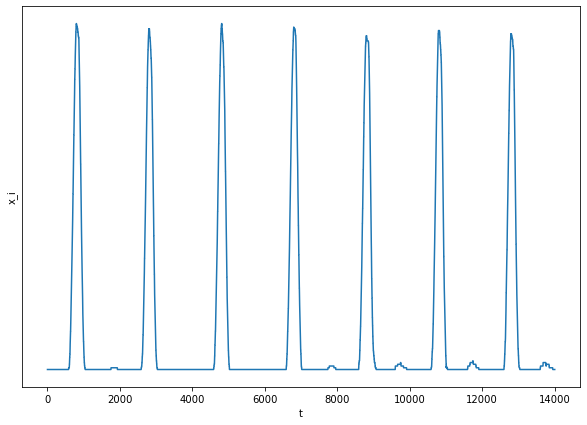

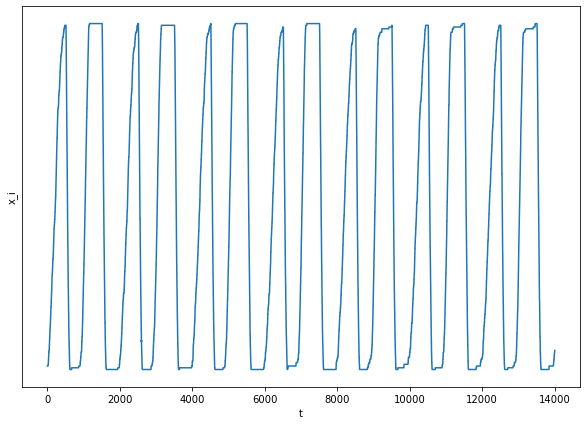

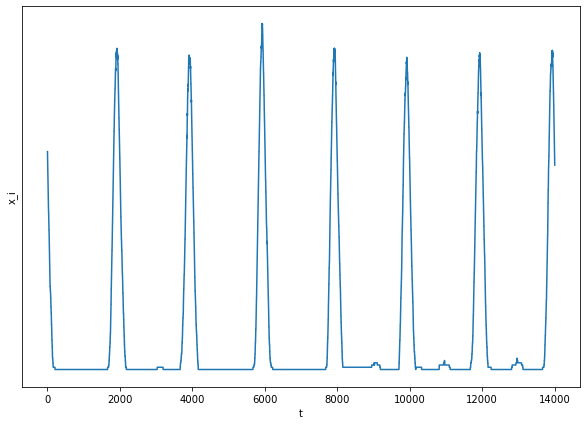

In [3]:
# Load data, remove burn-in period and data visualization.
data_list = load_data()
data = np.array(data_list)
data = data.astype(np.float)
data = data[1000:]

cols = [1,2,3]

for col in cols:
    plot_data(data, col)

In [4]:
df = pd.read_csv('datasets/MI_timesteps.txt', sep=" ")
df = df.drop(['timeStep'], axis=1)
df = df = df.iloc[1000:]

In [5]:
tsc_data = TSCDataFrame.from_single_timeseries(df)

In [6]:
tsc_data

feature   areaDensityCounting-PID5  areaDensityCounting-PID6  \
ID time                                                        
0  1000                          0                         2   
   1001                          0                         2   
   1002                          0                         2   
   1003                          0                         2   
   1004                          0                         2   
...                            ...                       ...   
   14996                         0                        10   
   14997                         0                        10   
   14998                         0                        10   
   14999                         0                        10   
   15000                         0                        11   

feature   areaDensityCounting-PID7  areaDensityCounting-PID8  \
ID time                                                        
0  1000                         97                         7   
   1001                         96                         7   
   1002                         95                         6   
   1003                         94                         6   
   1004                         92                         6   
...                            ...                       ...   
   14996                        95                         4   
   14997                        94                         3   
   14998                        93                         3   
   14999                        93                         3   
   15000                        91                         2   

feature   areaDensityCounting-PID9  areaDensityCounting-PID10  \
ID time                                                         
0  1000                          0                          0   
   1001                          0                          0   
   1002                          0                          0   
   1003                          0                          0   
   1004                          0                          0   
...                            ...                        ...   
   14996                         0                          0   
   14997                         0                          0   
   14998                         0                          1   
   14999                         0                          1   
   15000                         0                          0   

feature   areaDensityCounting-PID11  areaDensityCounting-PID12  \
ID time                                                          
0  1000                           5                          1   
   1001                           5                          1   
   1002                           5                          0   
   1003                           4                          1   
   1004                           5                          0   
...                             ...                        ...   
   14996                          2                          1   
   14997                          3                          1   
   14998                          2                          1   
   14999                          3                          1   
   15000                          1                          0   

feature   areaDensityCounting-PID13  
ID time                              
0  1000                          43  
   1001                          45  
   1002                          46  
   1003                          46  
   1004                          46  
...                             ...  
   14996                         39  
   14997                         39  
   14998                         40  
   14999                         41  
   15000                         42  

[14001 rows x 9 columns]

## DMD: Identity Dictionary

In [7]:
dmd = DMDFull().fit(X=tsc_data, store_koopman_matrix=True)  # must be TSCDataFrame
dmd_values = dmd.predict(tsc_data.initial_states(), time_values=None)

# Will be a red line in the plot
#dmd_values_oos = dmd.predict(np.array([-1.8, 2]), time_values=np.linspace(0, 100, 1000))

print("Data snipped with predicted time series data")
dmd_values

Data snipped with predicted time series data


feature   areaDensityCounting-PID5  areaDensityCounting-PID6  \
ID time                                                        
0  1000              -3.319567e-14                  2.000000   
   1001              -1.224676e-01                  2.244369   
   1002              -1.859633e-01                  2.503428   
   1003              -2.071541e-01                  2.772768   
   1004              -1.978603e-01                  3.049641   
...                            ...                       ...   
   14996              1.528385e+01                 59.823557   
   14997              1.528357e+01                 59.822446   
   14998              1.528329e+01                 59.821335   
   14999              1.528300e+01                 59.820225   
   15000              1.528272e+01                 59.819114   

feature   areaDensityCounting-PID7  areaDensityCounting-PID8  \
ID time                                                        
0  1000                  97.000000                  7.000000   
   1001                  96.297722                  6.874682   
   1002                  95.650442                  6.720674   
   1003                  95.039919                  6.547123   
   1004                  94.453548                  6.360357   
...                            ...                       ...   
   14996                  9.839230                  3.221742   
   14997                  9.839047                  3.221682   
   14998                  9.838864                  3.221622   
   14999                  9.838682                  3.221562   
   15000                  9.838499                  3.221503   

feature   areaDensityCounting-PID9  areaDensityCounting-PID10  \
ID time                                                         
0  1000              -1.557868e-14               2.498002e-16   
   1001               3.177831e-03               4.105778e-02   
   1002               6.680682e-03               6.415351e-02   
   1003               1.041067e-02               7.439983e-02   
   1004               1.430464e-02               7.544100e-02   
...                            ...                        ...   
   14996              7.772877e-01               1.297591e+00   
   14997              7.772733e-01               1.297567e+00   
   14998              7.772589e-01               1.297542e+00   
   14999              7.772444e-01               1.297518e+00   
   15000              7.772300e-01               1.297494e+00   

feature   areaDensityCounting-PID11  areaDensityCounting-PID12  \
ID time                                                          
0  1000                    5.000000                   1.000000   
   1001                    4.377787                   0.749011   
   1002                    3.915899                   0.577694   
   1003                    3.571903                   0.461057   
   1004                    3.314712                   0.381862   
...                             ...                        ...   
   14996                   0.339481                   0.058524   
   14997                   0.339475                   0.058523   
   14998                   0.339469                   0.058522   
   14999                   0.339462                   0.058521   
   15000                   0.339456                   0.058520   

feature   areaDensityCounting-PID13  
ID time                              
0  1000                   43.000000  
   1001                   43.854051  
   1002                   44.574112  
   1003                   45.198592  
   1004                   45.754639  
...                             ...  
   14996                  35.267746  
   14997                  35.267092  
   14998                  35.266437  
   14999                  35.265782  
   15000                  35.265127  

[14001 rows x 9 columns]

Original Data:

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

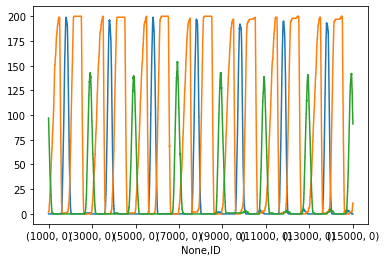

In [8]:
df['areaDensityCounting-PID5'].plot()
df['areaDensityCounting-PID6'].plot()
df['areaDensityCounting-PID7'].plot()

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

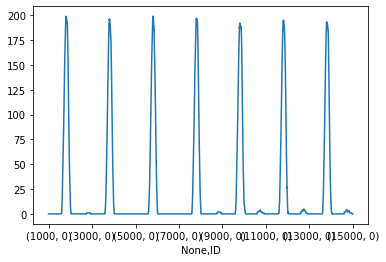

In [15]:
df['areaDensityCounting-PID5'].plot()

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

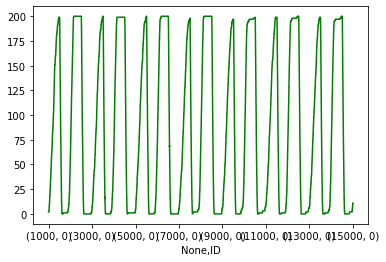

In [20]:
df['areaDensityCounting-PID6'].plot(color = 'green')

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

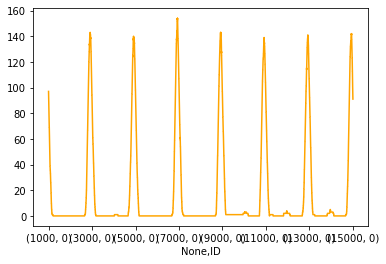

In [21]:
df['areaDensityCounting-PID7'].plot(color = 'orange')

Predictions using identity dictionary:

<AxesSubplot:xlabel='time'>

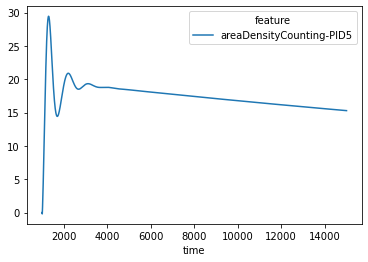

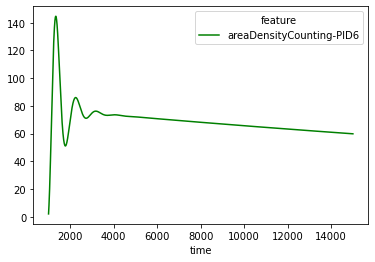

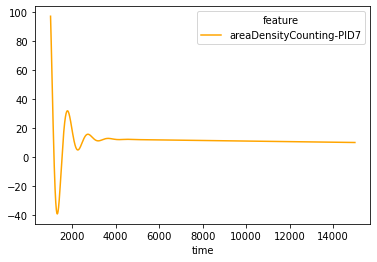

In [22]:
dmd_values['areaDensityCounting-PID5'].plot()
dmd_values['areaDensityCounting-PID6'].plot(color = 'green')
dmd_values['areaDensityCounting-PID7'].plot(color = 'orange')


## EDMD: Polynomial feature dictionary

In [10]:
dict_step = [
    (
        "polynomial",
        TSCPolynomialFeatures(degree=3),
    )
]

edmd_poly = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data)
edmd_poly_values = edmd_poly.predict(tsc_data.initial_states())

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:687: UserWarning: Shift matrix (shape=(219, 219)) has not full rank (=153), falling back to least squares solution. The sum of residuals is: 0.0
  f"Shift matrix (shape={G.shape}) has not full rank (={rank}), falling "
C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:236: RuntimeWarning: divide by zero encountered in log
  omegas = np.log(eigenvalues.astype(np.complex)) / time_delta
C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:236: RuntimeWarning: invalid value encountered in true_divide
  omegas = np.log(eigenvalues.astype(np.complex)) / time_delta
C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:241: RuntimeWarning: invalid value encountered in multiply
  @ diagmat_dot_mat(np.exp(omegas * time), initial_conditions)


In [25]:
# access models in the dictionary, the name was given in "dict_step" above
print(edmd_poly.named_steps["polynomial"])

print("")
print("polynomial degrees for data")
print(edmd_poly.named_steps["polynomial"].powers_)

print("")
print("Dictionary space values:")
edmd_p = edmd_poly.transform(tsc_data)
edmd_p

TSCPolynomialFeatures(degree=3, include_bias=False, include_first_order=False,
                      interaction_only=False)

polynomial degrees for data
[[2 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 1]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]

Dictionary space values:


feature   areaDensityCounting-PID5  areaDensityCounting-PID6  \
ID time                                                        
0  1000                          0                         2   
   1001                          0                         2   
   1002                          0                         2   
   1003                          0                         2   
   1004                          0                         2   
...                            ...                       ...   
   14996                         0                        10   
   14997                         0                        10   
   14998                         0                        10   
   14999                         0                        10   
   15000                         0                        11   

feature   areaDensityCounting-PID7  areaDensityCounting-PID8  \
ID time                                                        
0  1000                         97                         7   
   1001                         96                         7   
   1002                         95                         6   
   1003                         94                         6   
   1004                         92                         6   
...                            ...                       ...   
   14996                        95                         4   
   14997                        94                         3   
   14998                        93                         3   
   14999                        93                         3   
   15000                        91                         2   

feature   areaDensityCounting-PID9  areaDensityCounting-PID10  \
ID time                                                         
0  1000                          0                          0   
   1001                          0                          0   
   1002                          0                          0   
   1003                          0                          0   
   1004                          0                          0   
...                            ...                        ...   
   14996                         0                          0   
   14997                         0                          0   
   14998                         0                          1   
   14999                         0                          1   
   15000                         0                          0   

feature   areaDensityCounting-PID11  areaDensityCounting-PID12  \
ID time                                                          
0  1000                           5                          1   
   1001                           5                          1   
   1002                           5                          0   
   1003                           4                          1   
   1004                           5                          0   
...                             ...                        ...   
   14996                          2                          1   
   14997                          3                          1   
   14998                          2                          1   
   14999                          3                          1   
   15000                          1                          0   

feature   areaDensityCounting-PID13  areaDensityCounting-PID5^2  ...  \
ID time                                                          ...   
0  1000                          43                         0.0  ...   
   1001                          45                         0.0  ...   
   1002                          46                         0.0  ...   
   1003                          46                         0.0  ...   
   1004                          46                         0.0  ...   
...                             ...                         ...  ...   
   14996                         39                  

Original data

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

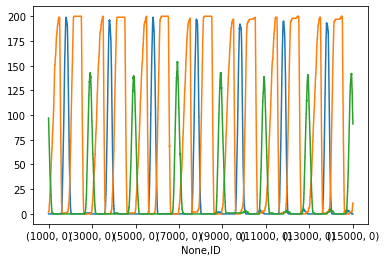

In [24]:
df['areaDensityCounting-PID5'].plot()
df['areaDensityCounting-PID6'].plot()
df['areaDensityCounting-PID7'].plot()

Predictions using polynomial feature dictionary

<AxesSubplot:xlabel='time'>

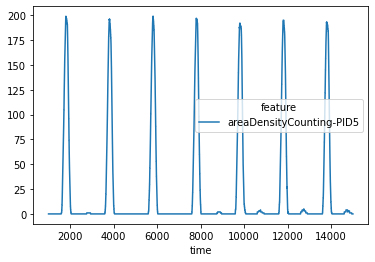

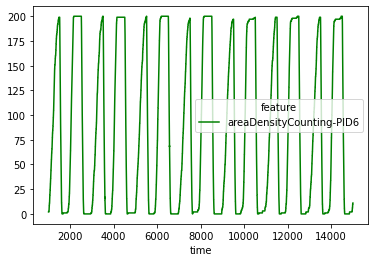

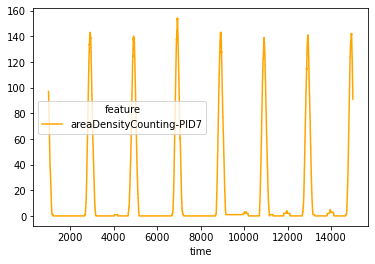

In [23]:
edmd_p['areaDensityCounting-PID5'].plot()
edmd_p['areaDensityCounting-PID6'].plot(color = 'green')
edmd_p['areaDensityCounting-PID7'].plot(color = 'orange')